# Hands-on Lab 5: Sensing Part 2
### EECS 16B: Designing Information Devices and Systems II, Spring 2022

Updated by Mia Mirkovic (2020)

Updated by Rafael Calleja (2021)

Updated by Steven Lu, Kaitlyn Chan (2021)

Updated by Steven Lu (2022)


## Table of Contents

* [Part 0: Before you Begin](#part0)
* [Part 1: Bass-ic Filter](#part1)
* [Part 2: Caught in the Midrange](#part2)


# <span style="color:navy">Introduction</span>
-----
Now that we've built the mic board circuitry, we can now convert your voice into an electrical signal for the Launchpad to read and work with. However, your voice isn't the only sound picked up by the microphone; there is a lot of background noise outside of your voice's frequency range that we don't want to pass to the Launchpad, as it could affect the readings. In order to remove that, we will be building circuits called filters in this lab: these "filter" out frequencies outside of their designated ranges, attenuating them and preventing them from being passed to the Launchpad.


## Lab Note
* [Lab Note](https://drive.google.com/file/d/15I89zMp8qW0wZE4fO37bM1gGAa3vjLn4/view?usp=sharing)

Review the lab note. The lab note provides a technical review of the concepts covered in lab as well as theoretical connections. **You should read the lab notes before your lab section.** They serve as a review and will be helpful as a reference during section.


## Pre-Lab

### Complete the pre-lab assignment before doing the lab. For hands-on students, submit your answers to the Gradescope assignment "[Hands-on] Pre-Lab 5: Sensing Part 2". Please make sure that you submit to the correct assignment. Pre-Lab 5 is due on Sunday, February 27 at 11:59pm. No late submissions will be accepted.


<a id='part0'></a>
# <span style="color:navy">Part 0: Before you Begin</span>
-----
### 0.1. Frequency Response of Speaker-Mic Board System
Before we begin the lab, please copy over the array of values for the speaker-microphone frequency response that you recorded in Lab 4 into the code block below. This will be useful later when we analyze the frequency response of our joint speaker-microphone and filter system.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sp
from pylab import * 
%matplotlib inline

Vpp =  [0, 0.6, 1, 1.5, 2.3, 4.1, 3.5, 3.1, 5.2, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 4.3]


Text(0, 0.5, 'Gain (Volts/Volts)')

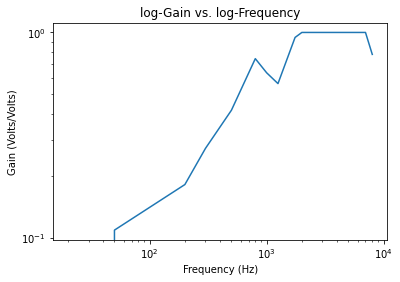

In [4]:
# Record the Vpp of the output sinusoid at each given frequency
freq = [20, 50, 200, 300, 500, 800, 1000, 1250, 1750, 2000, 2500, 3000, 4000, 5000, 6000, 7000, 8000]

Vpp = [0, 0.6, 1, 1.5, 2.3, 4.1, 3.5, 3.1, 5.2, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 4.3] # Fill in your values here
print("Vpp = ", Vpp)

# We do not have a measurable input signal Vin, so we normalize the maximum of the frequency response to 1.
gain = np.array(Vpp)/max(Vpp)

plt.loglog(freq, gain)
plt.title('log-Gain vs. log-Frequency')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain (Volts/Volts)')

### 0.2. Tune Your Mic Board
#### Materials:
- Phone speaker or headphones

**Before every lab that uses the mic board, you will need to retune the mic board in case the potentiometer was bumped or otherwise rotated from its "tuned" position (hopefully you won't need to tune it much). The steps for tuning your mic board are copied below.**

#### Tasks:
1. Power both of your regulators with 9V using the +25V channel on your DC power supply. Make sure to set the current limit to 0.1A!

2. Connect your oscilloscope probe to `Vout` on your mic board. Make sure you ground the black lead on the probe!

3. Add a **peak-to-peak** measurement for the oscilloscope channel you're using to probe your mic board output. To do this, click the "Meas" button, hit "Add Measurement," and then select the Peak-to-Peak (Vpp) option. Also, set the horizontal time scale to about 5-10 ms.

4.  **Play a pure tone using a [tone generator](https://www.szynalski.com/tone-generator/) in the range (1500 - 2000 Hz)** on your phone at a reasonable volume (leaning towards the soft side). Do NOT use a Youtube video!
    - If the tone generator website is not working for you, you can download a tone generator app onto your phone instead.
    - You'll likely have to unmute your phone for the sound to play.

5.  Make sure to point the speaker (on the bottom right for iPhones) directly at the mic and hold it a few inches away from the mic. 
    - The distance between your speaker and the mic affects the tuning process quite a bit, so **try to keep your speaker at a fixed distance from your mic for the rest of the lab**.

6. Turn the potentiometer on the mic board **(CW: decrease amplitude | CCW: increase amplitude)** using a screwdriver (or your student ID card) until you see a sine wave with a **peak-to-peak of around 2V to 2.5V** on the oscilloscope. **The sine wave should be centered at around 1.65V.**
    - **The potentiometer is a multiturn potentiometer, so you will have to turn it A LOT before you will notice any changes.**

7. Verify that the frequency of the measured sine wave matches the tone from your phone using your oscilloscope by adding a **frequency** measurement. To do this, click the "Meas" button, hit "Add Measurement," and then select the Frequency option.

#### Important Notes:
- With oscillating signals like this, there is an important concept called "railing." We define railing, with regards to this mic board, as non-linear behavior at the boundaries of the output range that results from the op-amp on the mic board being limited by its VDD and VSS, rendering it unable to output the entire output range. If you see flat edges/lines on either the top or bottom of the waveform instead of the smooth peaks and troughs of the sine wave, which happens if you have Vpp $\geq$3.3V, your mic board is railing, and you need to reduce the amplitude of the mic board output. Note that because we set the mic board VDD to 5V, the bottom of the sine wave will rail first, as the sine wave is centered at 1.65V, not the midpoint of the op-amp range of 0-5V.

|Normal/Correct Behavior:|Railing Behavior (AVOID THIS):|
|:-----------:|:-----------:|
|<img style="width:500px" src="images/not_railing.jpg">|<img style="width:500px" src="images/railing.jpg">|

- If you tap on the mic, it should rail, but **it should not be railing while you play the tone.**
- **DO NOT use autoscale on the oscilloscope!** It will not work well with our mic board signal because the signal varies very rapidly. Using autoscale often sets the timescale to a few nanoseconds, which is too small of a timescale to see anything of importance or value for us.

<span style="color:#ba190f">**Congratulations! You have successfully tuned your mic board!**</span>

### Help Request Link: https://links.eecs16b.org/lab-help-sp22


<a id='part1'></a>
# <span style="color:navy">Part 1: *Bass*ic Filter</span>

-----

## Project Breadboard Layout
In the first part of this lab, you will be building a low-pass filter and a non-inverting amplifier on your project breadboard. These circuits correspond to the brown region on the project breadboard layout below, with the non-inverting amplifier using the same op-amp chip as the mic board biasing circuit (since there are 2 op-amps per op-amp chip). **Again, we strongly recommend that you follow this layout as you build the different circuits for S1XT33N.**
<img width="600px" src="images/suggested_layout.jpg">


### Materials
- Capacitors
- Resistors
- Function generator
- Oscilloscope

## Tasks

### 1.1. Design and Build the Low-Pass Filter

1. On a sheet of paper, draw the circuit diagram for a first-order low pass RC filter. Write out the equation for its cutoff frequency $f_c$.

2. Choose values for $R$ and $C$ such that your cutoff frequency $f_c$ is roughly 2500 Hz. Don't worry about getting the exact cutoff frequency you chose, since you have limited component values. If you're a few hundred Hz off from what you started with, just take that as your new frequency.
    - The reason we choose 2500 Hz is because most of the human vocal range falls below 0-2500 Hz.
    
3. Record your values for $R$, $C$, and $f_c$ in the code below.

4. Build the low-pass filter on your **project breadboard**.
    - Look in the lab note for the resistor color code chart and capacitor code chart.
    - Remember, you can always "build" a new resistor value that isn't any of the ones we provided by putting resistors in series/parallel with each other!
    

#### Notes/Tips:
- Since we have far more resistor values than we have capacitor values, start by choosing an easy capacitor value, like 1uF, 0.1uF, etc. Pick one that lets you choose resistors of at least 1kOhm.

- You can always change your cutoff frequency later.

In [5]:
### YOUR CODE HERE
R = 6200
C = 0.00000001
f_c = 2567

print("Low pass filter")
print("===============")
print("Resistor: {} ohms".format(R))
print("Capacitor: {} farads".format(C))
print("Cutoff frequency: {} Hz".format(f_c))

Low pass filter
Resistor: 6200 ohms
Capacitor: 1e-08 farads
Cutoff frequency: 2567 Hz


### 1.2. Test the Low-Pass Filter

With the low pass filter built, now it's time to test it and make sure that the cutoff frequency is as you expected it to be!

1. Set your function generator to output a sinusoid with an offset of 1.65V, a frequency of the cutoff frequency of your low pass filter, and a peak-to-peak voltage of 1V. Remember to set the output load to High-Z!
2. Connect the function generator to the input of your low pass filter. **Make sure your mic board output is not connected to your filter for now**. Remember to ground the black lead of the function generator cable!
3. Probe the output of your low pass with your oscilloscope.
4. Make sure the gain/attentuation at the cutoff frequency is what you expect by comparing the peak-to-peak values of your input sinusoid and your filter's output sinusoid. 
    - When the low-pass filter is fed a sinusoid with a frequency equal to the filter's cutoff frequency, the output Vpp will be $\frac{1}{\sqrt 2}$ times the input Vpp. 
    - <span style="color:#075a04"> **Sanity check: If you further increase the frequency, should the output signal increase or decrease in peak-to-peak voltage?** </span>


### 1.3. Plot the Frequency Response of the Low-Pass-Filtered Mic Board

Now that we have our low-pass filter, it's time to connect it to our mic board. 
1. Connect the input of your filter to the **output of the mic board**, not the function generator.
2. Probe the output of your filter with your oscilloscope.

Once you have done that, first fill in your cutoff frequencies for your low pass filter in the script below and run it to plot the frequency response of just an RC low pass filter. 

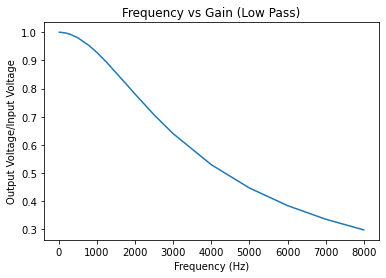

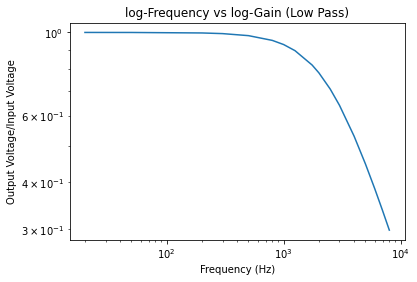

In [6]:
### TODO: Enter your low cutoff frequency below inside the float() call. 
low_cutoff = float(2500) #TODO

lp_p2p_expected = 1/(np.sqrt(1+((np.array(freq)/(low_cutoff))**2)))


plt.plot(freq, lp_p2p_expected)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Output Voltage/Input Voltage")
plt.title("Frequency vs Gain (Low Pass)")
plt.show()

plt.loglog(freq, lp_p2p_expected)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Output Voltage/Input Voltage")
plt.title("log-Frequency vs log-Gain (Low Pass)")
plt.show()

Next, measure and record the peak-to-peak voltage values into `lp_p2p_observed` for the given frequencies in `lp_freqs`. This is the frequency response of your low-pass filtered mic board.

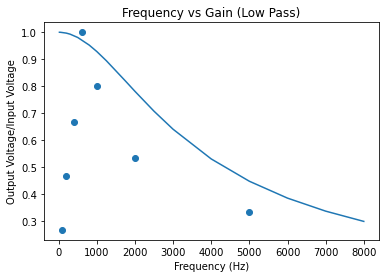

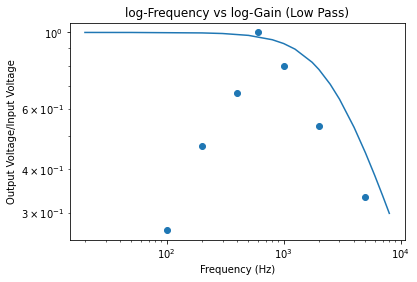

In [7]:
lp_freqs = [100, 200, 400, 600, 1000, 2000, 5000]
lp_p2p_observed = [.4, .7, 1, 1.5, 1.2, .8, .5] #TODO

lp_gain_observed = np.array(lp_p2p_observed)/np.max(lp_p2p_observed)

plt.xlabel("Frequency (Hz)")
plt.ylabel("Output Voltage/Input Voltage")
plt.title("Frequency vs Gain (Low Pass)")
plt.plot(freq, lp_p2p_expected)
plt.scatter(lp_freqs, lp_gain_observed)
plt.show()

plt.xlabel("Frequency (Hz)")
plt.ylabel("Output Voltage/Input Voltage")
plt.title("log-Frequency vs log-Gain (Low Pass)")
plt.loglog(freq, lp_p2p_expected)
plt.scatter(lp_freqs, lp_gain_observed)
plt.show()

<span style="color:#075a04"> **Sanity check: Does the frequency response of your low-pass filtered mic board match the frequency response of a low-pass RC filter? Why or why not?** </span>


Now, we will multiply the low-pass filter frequency response (lp_p2p_expected) with our speaker-mic board frequency response (the variable called gain). Run the script below to plot the resulting frequency response.

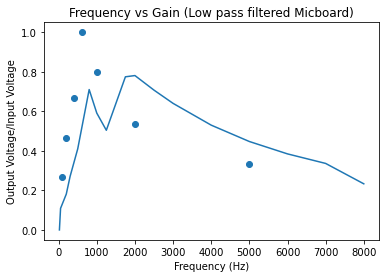

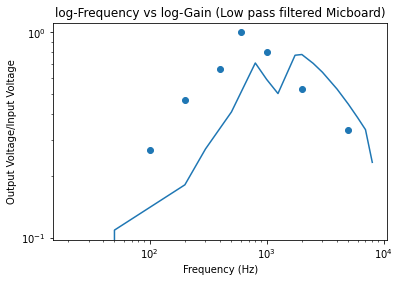

In [8]:
response_lp_micboard = np.multiply(lp_p2p_expected, gain)

plt.xlabel("Frequency (Hz)")
plt.ylabel("Output Voltage/Input Voltage")
plt.title("Frequency vs Gain (Low pass filtered Micboard)")
plt.plot(freq, response_lp_micboard)
plt.scatter(lp_freqs,lp_gain_observed)
plt.show()

plt.xlabel("Frequency (Hz)")
plt.ylabel("Output Voltage/Input Voltage")
plt.title("log-Frequency vs log-Gain (Low pass filtered Micboard)")
plt.loglog(freq, response_lp_micboard)
plt.scatter(lp_freqs,lp_gain_observed)
plt.show()


<span style="color:#075a04"> **Sanity check: Does the frequency response of your low-pass filtered mic board match the frequency response of the low-pass filter multiplied with our speaker-mic board frequency response? Why or why not?** </span>

### 1.4. Amplify the Low-Pass Signal
After filtering, the signal may not be strong enough to pass on to the Launchpad. So, we may need an amplifier in order to be able to measure it reasonably well.
1. Build a non-inverting amplifier with a **gain of 2** as shown in the diagram below on your project breadboard using resistor values of $\geq$1k$\Omega$.
    - **Hint:** The equation for the gain of a non-inverting amplifier is $1 + \frac{R_f}{R_1}$ according to the circuit diagram below.
    - **You may need to raise or lower the gain later** depending on your setup. You can reduce it to a buffer if you don't need any extra gain.
    - Connect the op-amp VDD to your 3.3V rail, and VSS to GND.
    - The output Vpp needs to be around 2-2.5V for good readings without railing.
    - R1 is no longer connected to GND, but to 1.65V, in order to preserve our 1.65V offset.
2. Connect the output of your filter to the input of your amplifier, and probe the output of your amplifier.
3. Make some noises at your microphone. You should see it respond on the oscilloscope.
    - Play some different frequencies from [this tone generator website](http://www.szynalski.com/tone-generator/) and see its response!


|Non-inverting Amplifier:|Op-Amp Pinout:|
|:-----:|:---------------:|
|<img style="width:500px" src="images/sp22_low_pass.png">|<img style="width:500px" src="images/op_amp_pinout.png">| 

<a id='part2'></a>
# <span style="color:navy">Part 2: Caught in the Midrange</span>

-----
Often times, we're interested in a more narrow frequency range (i.e. 1kHz to 3kHz) than the range of 0 to our low-pass cutoff frequency. In order to accomplish this, we will build what's known as a band-pass filter, which utilizes both a high-pass and low-pass filter to select a range of frequencies to pass. We'll build the high-pass filter on your non-project breadboard, because we'll only be keeping the low-pass filter for future project labs.


#### Materials
- Capacitors
- Resistors
- Phone speaker or headphones
- Oscilloscope probes

## Tasks

### 2.1. Design and Build the High-Pass Filter Circuit

1. On a sheet of paper, draw the circuit diagram for a first-order high pass RC filter. Write out the equation for its cutoff frequency $f_c$. 

2. Choose values for $R$ and $C$ such that your cutoff frequency $f_c$ is in the range 800 - 1000 Hz. Don't worry about getting the exact cutoff frequency you chose, since you have limited component values. If you're a few hundred Hz off from what you started with, just take that as your new frequency.
    
3. Record your values for $R$, $C$, and $f_c$ in the code below.

4. Build the high-pass filter on your **non-project breadboard**.
    - <span style="color:red"> **NOTE: Instead of connecting the end of the resistor to ground, connect it to the `Half Rail` from your project breadboard, as shown below.**</span>
    - Remember to connect the non-project breadboards' negative rails to your ground rails on your project breadboard!
    
<img style="width:250px" src="images/high_pass_alone.png">
    
- <span style="color:#075a04"> **Sanity check: Why do we do this?** </span>

#### Notes/Tips:
 
- Since we have far more resistor values than we have capacitor values, start by choosing an easy capacitor value. Pick one that that lets you choose resistors of at least 1kOhm.

- Because the frequencies are attentuated slowly in a first order filter, you may want to choose a cutoff frequency closer to the middle of the specified range.

- You can always change your cutoff frequency later.

In [10]:
### YOUR CODE HERE
R = 1500
C = 0.000001
f_c = 1000

print("High pass filter")
print("================")
print("Resistor: {} ohms".format(R))
print("Capacitor: {} farads".format(C))
print("Cutoff frequency: {} Hz".format(f_c))

High pass filter
Resistor: 1500 ohms
Capacitor: 1e-06 farads
Cutoff frequency: 1000 Hz


### 2.2. Test the High-Pass Filter

With the high pass filter built, now it's time to test it and make sure that the cutoff frequency is as you expected it to be!

1. Set your function generator to output a sinusoid with an offset of 1.65V, a frequency of the cutoff frequency of your high pass filter, and a peak-to-peak voltage of 1V.
2. Connect the function generator to the input of your high pass filter. Remember to ground the black lead of the function generator cable!
3. Probe the output of your high pass with your oscilloscope.
4. Make sure the gain/attentuation at the cutoff frequency is what you expect by comparing the peak-to-peak values of your input sinusoid and your filter's output sinusoid. 
    - <span style="color:#075a04"> **Sanity check: If you further increase the frequency, should the output signal increase or decrease in peak-to-peak voltage?** </span>

### 2.3 Build the Band-Pass Filter
1. Connect the **output of the amplifier** you built for the low-pass filter in Part 1.4 to the input of the high pass filter you built in Part 2.1.
    - This amplifier already serves the purpose of isolating the low-pass filter from the high-pass filter, so we do not need another buffer between the amplifier's output and the input of the high pass.
2. At this point, your circuits should be chained as follows (also depicted below) across your two breadboards: Mic board -> low-pass filter -> amplifier for low-pass filter -> high-pass filter
<img style="width:750px" src="images/band-flow.png">

### 2.4. Plot the Frequency Response of the Micboard Band-Pass System

1. Connect the input of your band-pass filter (the input of the low pass filter) to the output of the mic board.
2. Probe the output of your band-pass filter (the output of the high pass filter) with your oscilloscope.

Once you have done that, first fill in your cutoff frequencies for your high pass filter in the script below and run it to plot the frequency response of just a band-pass filter. 

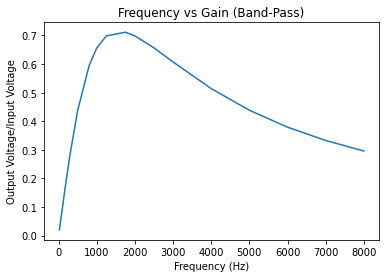

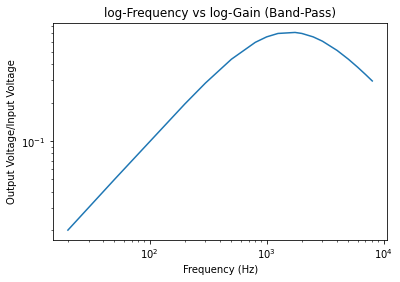

In [11]:
### TODO: Enter your high cutoff frequency below inside the float() call. 
high_cutoff = float(1000) #TODO

hp_p2p_expected =  (np.array(freq)/high_cutoff)/(np.sqrt(1 + (np.array(freq)/high_cutoff)**2))
bp_p2p_expected = np.multiply(hp_p2p_expected, lp_p2p_expected)

plt.xlabel("Frequency (Hz)")
plt.ylabel("Output Voltage/Input Voltage")
plt.title("Frequency vs Gain (Band-Pass)")
plt.plot(freq, bp_p2p_expected)
plt.show()

plt.xlabel("Frequency (Hz)")
plt.ylabel("Output Voltage/Input Voltage")
plt.title("log-Frequency vs log-Gain (Band-Pass)")
plt.loglog(freq, bp_p2p_expected)
plt.show()

Next, measure and record the peak-to-peak voltage values into `bp_p2p_observed` for the given frequencies in `bp_freqs`. This is the frequency response of your band-pass filtered mic board.

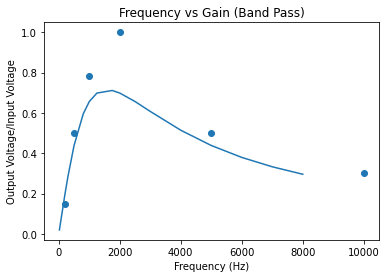

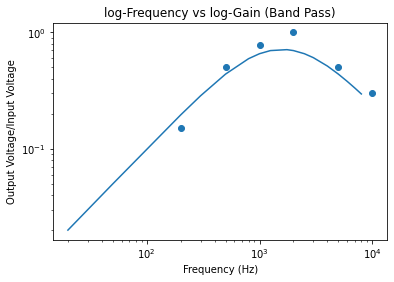

In [12]:
bp_freqs = [200, 500, 1000, 2000, 5000, 10000]
bp_p2p_observed = [.24, .8, 1.25, 1.6, .8, .48] #TODO

bp_gain_observed = np.array(bp_p2p_observed)/np.max(bp_p2p_observed)

plt.xlabel("Frequency (Hz)")
plt.ylabel("Output Voltage/Input Voltage")
plt.title("Frequency vs Gain (Band Pass)")
plt.plot(freq, bp_p2p_expected)
plt.scatter(bp_freqs, bp_gain_observed)
plt.show()

plt.xlabel("Frequency (Hz)")
plt.ylabel("Output Voltage/Input Voltage")
plt.title("log-Frequency vs log-Gain (Band Pass)")
plt.loglog(freq, bp_p2p_expected)
plt.scatter(bp_freqs, bp_gain_observed)
plt.show()

<span style="color:#075a04"> **Sanity check: Does the frequency response of your band-pass filtered mic board match the frequency response of a band-pass RC filter? Why or why not?** </span>


Now, we will multiply the band-pass filter frequency response (bp_p2p_expected) with our speaker-mic board frequency response (the variable called gain). Run the script below to plot the resulting frequency response.

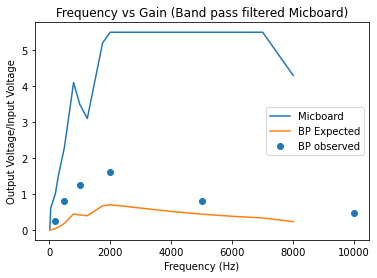

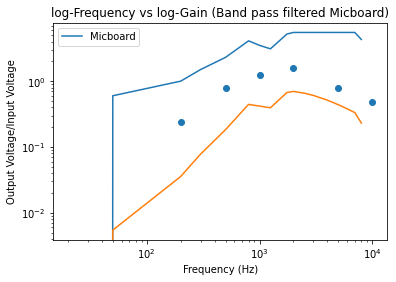

In [13]:
response_bp_micboard = np.multiply(bp_p2p_expected, gain)

plt.xlabel("Frequency (Hz)")
plt.ylabel("Output Voltage/Input Voltage")
plt.title("Frequency vs Gain (Band pass filtered Micboard)")
plt.plot(freq, Vpp, label="Micboard")
plt.plot(freq, response_bp_micboard, label="BP Expected")
plt.scatter(bp_freqs, bp_p2p_observed, label="BP observed")
plt.legend()
plt.show()

plt.xlabel("Frequency (Hz)")
plt.ylabel("Output Voltage/Input Voltage")
plt.title("log-Frequency vs log-Gain (Band pass filtered Micboard)")
plt.loglog(freq, Vpp, label="Micboard")
plt.loglog(freq, response_bp_micboard)
plt.scatter(bp_freqs, bp_p2p_observed)
plt.legend()
plt.show()

<span style="color:#075a04"> **Sanity check: Does the frequency response of your band-pass filtered mic board match the frequency response of the band-pass filter multiplied with our speaker-mic board frequency response? Why or why not?** </span>

<a id='checkoff'> </a>

# <span style="color:#ba190f">CHECKOFF</span>


- **Have all questions and plots completed in this notebook.**

- **Show your TA your working circuits:**
    - Demonstrate working low-pass filter. 
    - Show your frequency response plots of the low-pass filter. 
    - Demonstrate working band-pass filter. 
    - Show your frequency response plots of the band-pass filter.

- **Be prepared to answer conceptual questions about the lab.**

### Checkoff Request Link: https://links.eecs16b.org/lab-checkoff-sp22


**After checkoff, please:**

- <span style="color:#ff0000"> **Keep the mic board, biasing circuits, and low-pass filter from Part 1 you built on your project breadboard! DO NOT DISMANTLE ANY CIRCUITS FROM YOUR PROJECT BREADBOARD! You will need them for the rest of the project!**</span> You can disassemble the high-pass filter on your non-project breadboard.

- Store all your electrical components in a neat and organized manner.
- Make sure that all components that you received in your lab kit are stored safely for use in future labs.

- ### **Remember what each part of your circuit is for (Record this in a Google doc or somewhere else safe). You will need to write summaries for both the midterm and final lab reports!**
